# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
#!pip install tensorflow
#!pip install keras

Empezamos importando librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [4]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [5]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [7]:
y_train[0]

5

C:\Users\Sandia\AppData\Local\Temp\ipykernel_13932\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


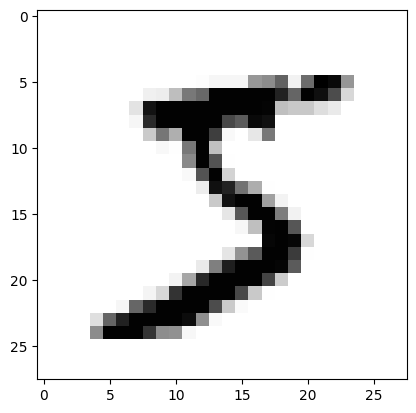

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
0/255

0.0

In [10]:
128/255

0.5019607843137255

In [11]:
255/255

1.0

In [12]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [13]:
np.mean(X_train)

0.13066062

In [14]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [16]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [18]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [19]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [20]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [21]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [22]:
len(weights[0])

300

In [23]:
weights.size

235200

In [24]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [25]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [26]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [27]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [28]:
X_train.shape

(50000, 28, 28)

In [29]:
50000/128

390.625

In [30]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50


391/391 [==============================] - 5s 9ms/step - loss: 1.2214 - accuracy: 0.7021 - val_loss: 0.5898 - val_accuracy: 0.8699
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 0.5121 - accuracy: 0.8699 - val_loss: 0.3963 - val_accuracy: 0.8988
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3998 - accuracy: 0.8903 - val_loss: 0.3381 - val_accuracy: 0.9077
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3522 - accuracy: 0.9010 - val_loss: 0.3074 - val_accuracy: 0.9145
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3232 - accuracy: 0.9084 - val_loss: 0.2882 - val_accuracy: 0.9189
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3024 - accuracy: 0.9137 - val_loss: 0.2737 - val_accuracy: 0.9227
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.2859 - accuracy: 0.9184 - val_loss: 0.2593 - val_accuracy: 0.9250
Epoc

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [37]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0739 - accuracy: 0.9800 - val_loss: 0.0987 - val_accuracy: 0.9728
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0714 - accuracy: 0.9805 - val_loss: 0.0962 - val_accuracy: 0.9735
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0690 - accuracy: 0.9812 - val_loss: 0.0967 - val_accuracy: 0.9729
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0666 - accuracy: 0.9820 - val_loss: 0.0926 - val_accuracy: 0.9748
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0642 - accuracy: 0.9830 - val_loss: 0.0941 - val_accuracy: 0.9736
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0621 - accuracy: 0.9837 - val_loss: 0.0913 - val_accuracy: 0.9733
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0600 - accuracy: 0.9843 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [38]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.2213584184646606,
  0.5121334195137024,
  0.3997834026813507,
  0.3521592617034912,
  0.3231603801250458,
  0.3023580312728882,
  0.28588560223579407,
  0.27190008759498596,
  0.25974637269973755,
  0.2487768530845642,
  0.23910468816757202,
  0.23000945150852203,
  0.2217647135257721,
  0.214200958609581,
  0.20704662799835205,
  0.20015378296375275,
  0.1940632164478302,
  0.18813447654247284,
  0.18235555291175842,
  0.17676247656345367,
  0.17170868813991547,
  0.16671182215213776,
  0.1619427502155304,
  0.15756827592849731,
  0.15333802998065948,
  0.14930185675621033,
  0.14531269669532776,
  0.14173629879951477,
  0.13797077536582947,
  0.1344749629497528,
  0.1311349719762802,
  0.12797698378562927,
  0.12471095472574234,
  0.12190768867731094,
  0.11917765438556671,
  0.1164034828543663,
  0.11382647603750229,
  0.11117918789386749,
  0.10871678590774536,
  0.1063399612903595,
  0.1040201187133789,
  0.10177845507860184,
  0.09977845847606659,
  0.0977034047245979

In [39]:
history.history

{'loss': [1.2213584184646606,
  0.5121334195137024,
  0.3997834026813507,
  0.3521592617034912,
  0.3231603801250458,
  0.3023580312728882,
  0.28588560223579407,
  0.27190008759498596,
  0.25974637269973755,
  0.2487768530845642,
  0.23910468816757202,
  0.23000945150852203,
  0.2217647135257721,
  0.214200958609581,
  0.20704662799835205,
  0.20015378296375275,
  0.1940632164478302,
  0.18813447654247284,
  0.18235555291175842,
  0.17676247656345367,
  0.17170868813991547,
  0.16671182215213776,
  0.1619427502155304,
  0.15756827592849731,
  0.15333802998065948,
  0.14930185675621033,
  0.14531269669532776,
  0.14173629879951477,
  0.13797077536582947,
  0.1344749629497528,
  0.1311349719762802,
  0.12797698378562927,
  0.12471095472574234,
  0.12190768867731094,
  0.11917765438556671,
  0.1164034828543663,
  0.11382647603750229,
  0.11117918789386749,
  0.10871678590774536,
  0.1063399612903595,
  0.1040201187133789,
  0.10177845507860184,
  0.09977845847606659,
  0.0977034047245979

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.221358,0.70210,0.589782,0.8699
1,0.512133,0.86986,0.396305,0.8988
2,0.399783,0.89032,0.338094,0.9077
3,0.352159,0.90100,0.307358,0.9145
4,0.323160,0.90844,0.288197,0.9189
5,0.302358,0.91370,0.273702,0.9227
6,0.285886,0.91836,0.259315,0.9250
7,0.271900,0.92240,0.248187,0.9289
8,0.259746,0.92558,0.238596,0.9314
9,0.248777,0.92878,0.231156,0.9333


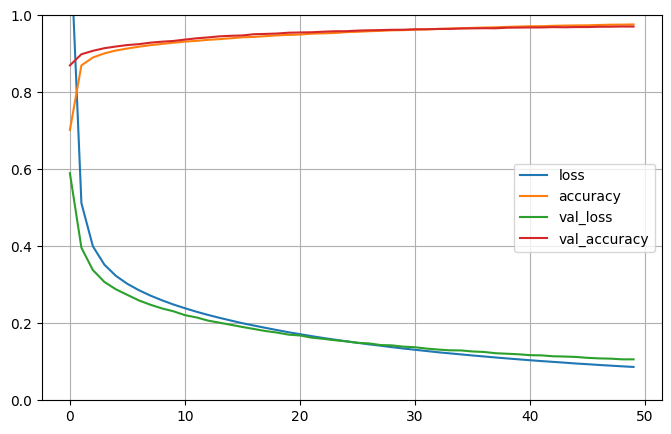

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [43]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9737


[0.0855419933795929, 0.9736999869346619]

C:\Users\Sandia\AppData\Local\Temp\ipykernel_13932\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


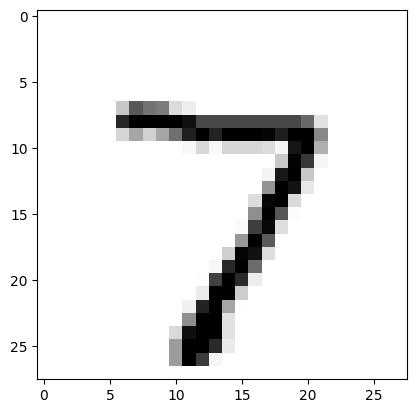

In [44]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [45]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [46]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 347ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [47]:
predictions.argmax()

7

In [48]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\Sandia\AppData\Local\Temp\ipykernel_13932\1084033691.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


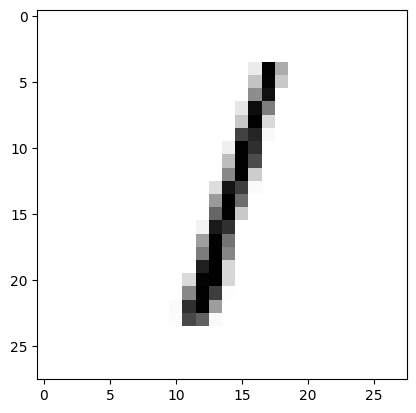

In [49]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [1]:
import tensorflow as tf

# Cargar los datos del Boston Housing dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)


57026/57026 [==============================] - 0s 0us/step


In [2]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# housing = fetch_california_housing()
# df = pd.DataFrame(housing.data, columns = housing.feature_names)
# df['target'] = housing['target']
# df.head()

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


Divimos en train, test y validation

In [4]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
#                                                               housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
X_train.shape

(303, 13)

In [6]:
X_train.shape[1:]

(13,)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [7]:
11610/32

362.8125

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mean_absolute_percentage_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))



Epoch 1/20

10/10 [==============================] - 1s 45ms/step - loss: 88.3326 - val_loss: 76.4605
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 69.1229 - val_loss: 57.3587
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 45.2920 - val_loss: 34.8548
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 29.9519 - val_loss: 24.7617
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 23.4809 - val_loss: 19.8936
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 19.3701 - val_loss: 17.5594
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 16.5051 - val_loss: 16.4395
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 15.4587 - val_loss: 17.2490
Epoch 9/20
10/10 [==============================] - 0s 10ms/step - loss: 14.7789 - val_loss: 16.1811
Epoch 10/20
10/10 [==============================] - 0s 10ms/step - loss: 14.3171 - val_

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

4/4 [==============================] - 0s 5ms/step - loss: 15.3376
15.33757495880127


In [11]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 242ms/step


array([[ 7.2701473],
       [18.914732 ],
       [21.049574 ],
       [24.447437 ],
       [25.39354  ]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [12]:
model.save("my_keras_model.h5")

c:\Users\Sandia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Lo volvemos a cargar
#model = tf.keras.models.load_model("callback_model.h5")
model = tf.keras.models.load_model("my_keras_model.h5")

In [28]:
del model

In [15]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 15.3376


15.33757495880127

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [16]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30


10/10 [==============================] - 1s 10ms/step - loss: 11.3860
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 11.3016
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 10.9767
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 10.9832
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 11.1995
Epoch 6/30
10/10 [==============================] - 0s 10ms/step - loss: 11.0191
Epoch 7/30
10/10 [==============================] - 0s 9ms/step - loss: 10.7609
Epoch 8/30
10/10 [==============================] - 0s 6ms/step - loss: 10.5967
Epoch 9/30
10/10 [==============================] - 0s 6ms/step - loss: 10.7655
Epoch 10/30
10/10 [==============================] - 0s 6ms/step - loss: 10.6118
Epoch 11/30
10/10 [==============================] - 0s 6ms/step - loss: 10.0397
Epoch 12/30
10/10 [==============================] - 0s 7ms/step - loss: 9.9295
Epoch 13/30
10/10 [============================

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [17]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, )
history = model.fit(X_train,
                   y_train,
                   epochs=2000,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/2000


10/10 [==============================] - 0s 43ms/step - loss: 9.7599 - val_loss: 12.0232
Epoch 2/2000
10/10 [==============================] - 0s 15ms/step - loss: 9.2907 - val_loss: 12.6334
Epoch 3/2000
10/10 [==============================] - 0s 14ms/step - loss: 9.2335 - val_loss: 13.2166
Epoch 4/2000
10/10 [==============================] - 0s 14ms/step - loss: 9.1022 - val_loss: 10.8378
Epoch 5/2000
10/10 [==============================] - 0s 10ms/step - loss: 10.0858 - val_loss: 11.6747
Epoch 6/2000
10/10 [==============================] - 0s 10ms/step - loss: 9.2324 - val_loss: 11.7427
Epoch 7/2000
10/10 [==============================] - 0s 11ms/step - loss: 9.1218 - val_loss: 10.4511
Epoch 8/2000
10/10 [==============================] - 0s 11ms/step - loss: 9.3793 - val_loss: 13.0371
Epoch 9/2000
10/10 [==============================] - 0s 9ms/step - loss: 9.2381 - val_loss: 12.0828
Epoch 10/2000
10/10 [==============================] - 0s 10ms/step - loss: 9.2712 - val_loss: 